In [1]:
!sudo apt-get update -qq
!sudo apt-get install -qq -y fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [2]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                2062 non-null   object 
 1   주거 형태              2062 non-null   object 
 2   연간 소득              2062 non-null   float64
 3   현재 직장 근속 연수        2062 non-null   object 
 4   체납 세금 압류 횟수        2062 non-null   float64
 5   개설된 신용계좌 수         2062 non-null   int64  
 6   신용 거래 연수           2062 non-null   float64
 7   최대 신용한도            2062 non-null   float64
 8   신용 문제 발생 횟수        2062 non-null   int64  
 9   마지막 연체 이후 경과 개월 수  2062 non-null   int64  
 10  개인 파산 횟수           2062 non-null   int64  
 11  대출 목적              2062 non-null   object 
 12  대출 상환 기간           2062 non-null   object 
 13  현재 대출 잔액           2062 non-null   float64
 14  현재 미상환 신용액         2062 non-null   float64
 15  월 상환 부채액           2062 non-null   float64
 16  신용 점수              2062 

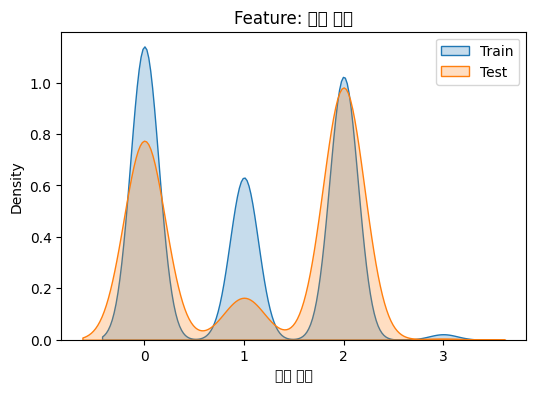

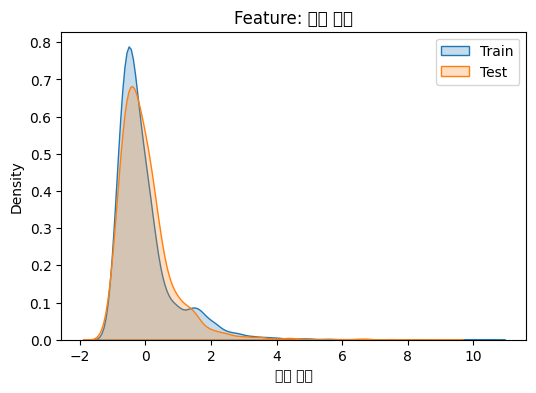

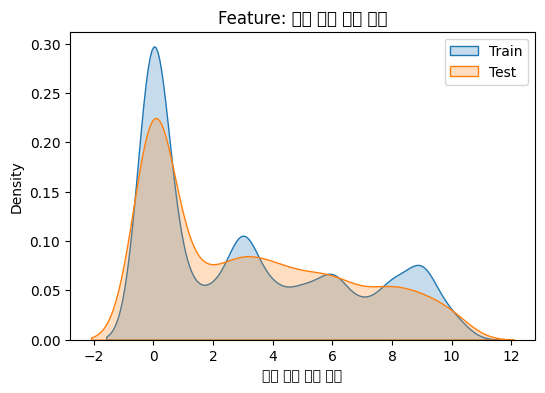

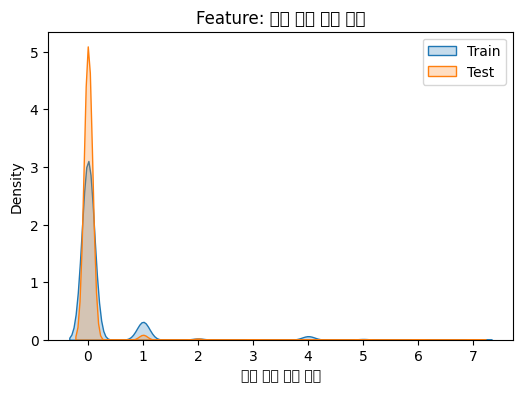

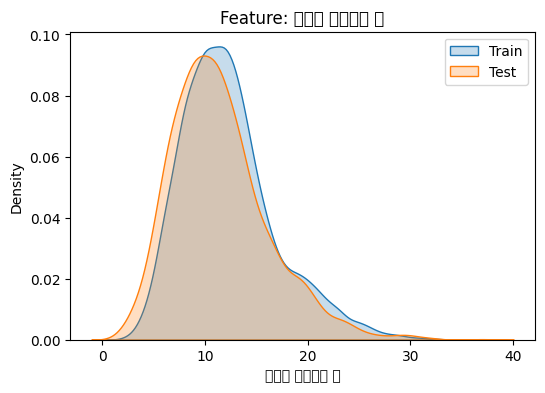

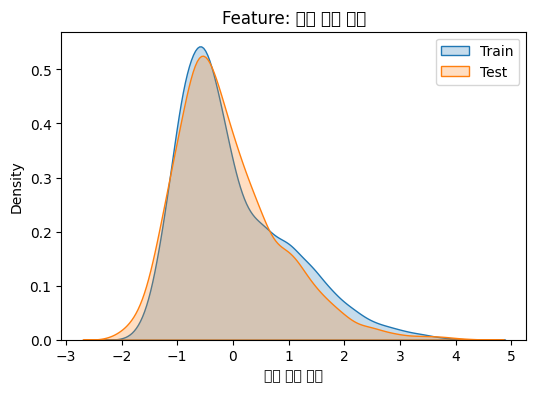

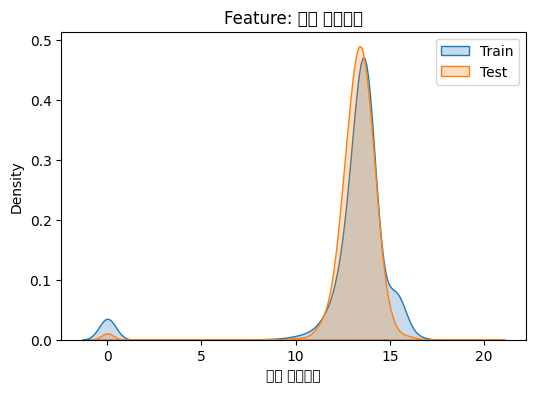

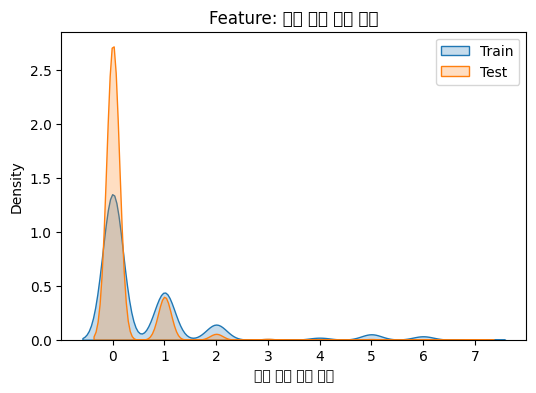

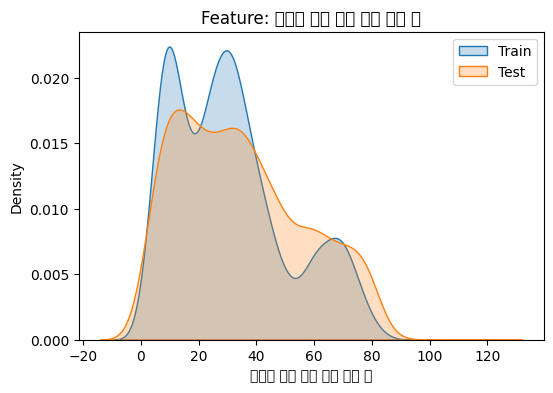

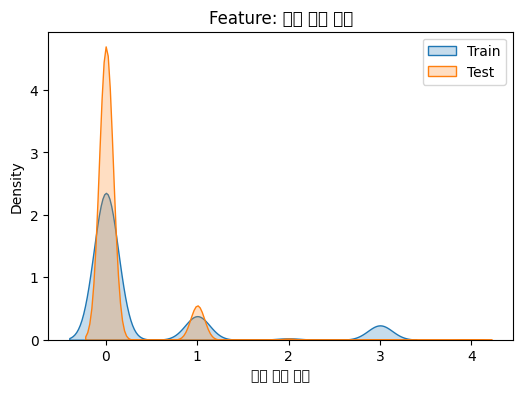

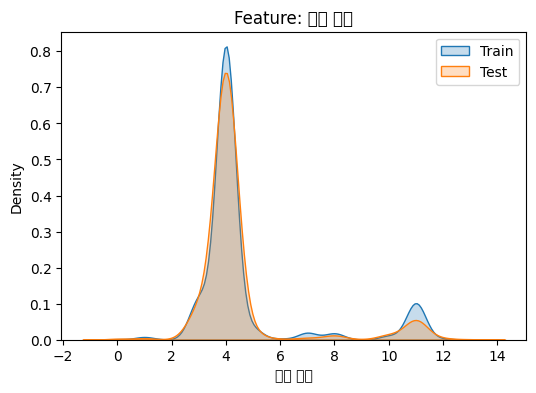

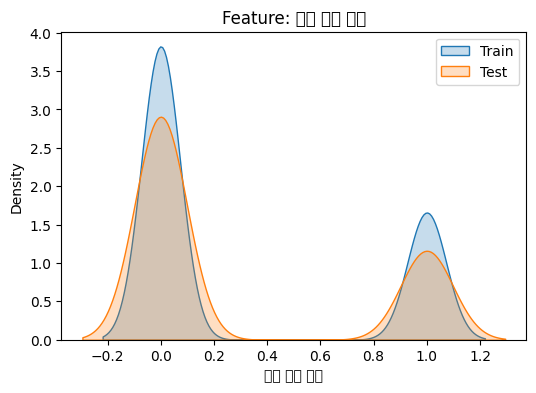

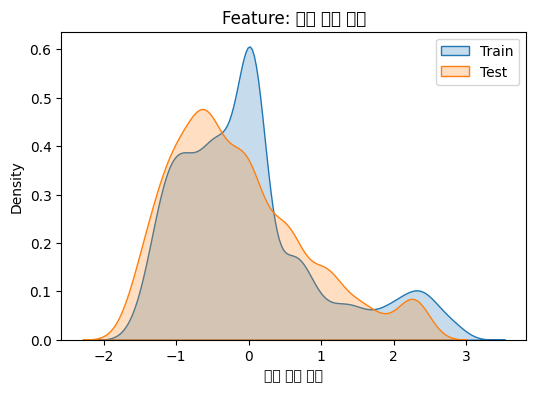

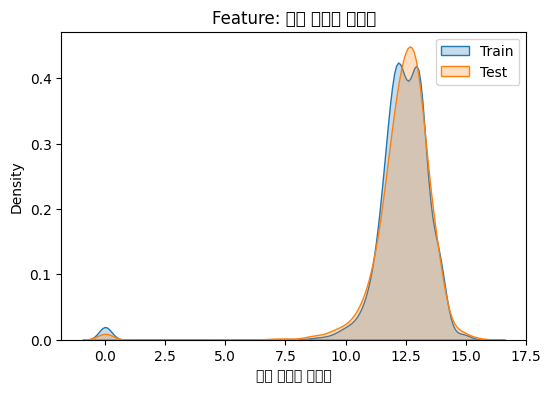

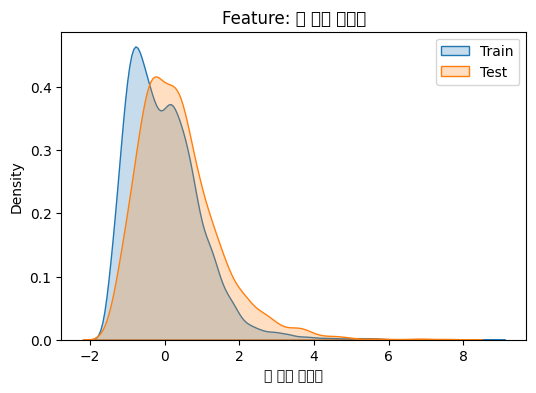

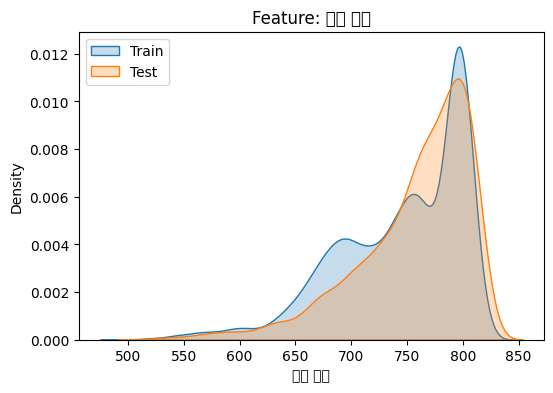

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in train.columns:
    if train[col].dtype == 'object' or train[col].dtype.name == 'category':
        train[col] = train[col].astype('category').cat.codes
        test[col] = test[col].astype('category').cat.codes

    plt.figure(figsize=(6, 4))
    sns.kdeplot(train[col], label="Train", fill=True)
    sns.kdeplot(test[col], label="Test", fill=True)
    plt.title(f"Feature: {col}")
    plt.legend()
    plt.show()

In [7]:
y=train.pop('채무 불이행 여부')
test_UID=test.pop('UID')

In [8]:
train.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751


In [9]:
test.head()

,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
0,월세,1560090.0,10년 이상,0.0,13,12.0,495561.0,0,18,0,기타,단기 상환,376332.0,133522.5,29641.5,736
1,주택 담보 대출 (거주 중),2102616.0,2년,0.0,9,29.0,580833.0,0,40,0,부채 통합,장기 상환,830379.0,302983.5,20151.0,718
2,주택 담보 대출 (거주 중),2477989.5,10년 이상,0.0,11,26.5,995841.0,0,44,0,부채 통합,장기 상환,877635.0,379278.0,13113.0,722
3,주택 담보 대출 (거주 중),1571091.0,6년,0.0,7,34.4,601656.0,0,45,0,부채 통합,단기 상환,487278.0,275395.5,11679.0,762
4,주택 담보 대출 (거주 중),2290260.0,10년 이상,0.0,19,25.0,1954623.0,0,14,0,부채 통합,단기 상환,397782.0,742767.0,42370.5,775


In [10]:
train.nunique()

,0
UID,10000
주거 형태,4
연간 소득,9970
현재 직장 근속 연수,11
체납 세금 압류 횟수,8
개설된 신용계좌 수,33
신용 거래 연수,397
최대 신용한도,9585
신용 문제 발생 횟수,8
마지막 연체 이후 경과 개월 수,88


In [11]:
cat_features = ["주거 형태", "현재 직장 근속 연수", "대출 목적", "대출 상환 기간"]
for col in cat_features:
    train[col] = train[col].astype("category")
    test[col] = test[col].astype("category")

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   UID                10000 non-null  object  
 1   주거 형태              10000 non-null  category
 2   연간 소득              10000 non-null  float64 
 3   현재 직장 근속 연수        10000 non-null  category
 4   체납 세금 압류 횟수        10000 non-null  float64 
 5   개설된 신용계좌 수         10000 non-null  int64   
 6   신용 거래 연수           10000 non-null  float64 
 7   최대 신용한도            10000 non-null  float64 
 8   신용 문제 발생 횟수        10000 non-null  int64   
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64   
 10  개인 파산 횟수           10000 non-null  int64   
 11  대출 목적              10000 non-null  category
 12  대출 상환 기간           10000 non-null  category
 13  현재 대출 잔액           10000 non-null  float64 
 14  현재 미상환 신용액         10000 non-null  float64 
 15  월 상환 부채액           10000 non-null  float64 
 16  신용 점수

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   주거 형태              2062 non-null   category
 1   연간 소득              2062 non-null   float64 
 2   현재 직장 근속 연수        2062 non-null   category
 3   체납 세금 압류 횟수        2062 non-null   float64 
 4   개설된 신용계좌 수         2062 non-null   int64   
 5   신용 거래 연수           2062 non-null   float64 
 6   최대 신용한도            2062 non-null   float64 
 7   신용 문제 발생 횟수        2062 non-null   int64   
 8   마지막 연체 이후 경과 개월 수  2062 non-null   int64   
 9   개인 파산 횟수           2062 non-null   int64   
 10  대출 목적              2062 non-null   category
 11  대출 상환 기간           2062 non-null   category
 12  현재 대출 잔액           2062 non-null   float64 
 13  현재 미상환 신용액         2062 non-null   float64 
 14  월 상환 부채액           2062 non-null   float64 
 15  신용 점수              2062 non-null   int64   
dtypes: cat

In [14]:
train=train.drop(columns='UID')

In [15]:
import numpy as np

# 로그 변환 적용
train["최대 신용한도"] = np.log1p(train["최대 신용한도"])
test["최대 신용한도"] = np.log1p(test["최대 신용한도"])

train["현재 미상환 신용액"] = np.log1p(train["현재 미상환 신용액"])
test["현재 미상환 신용액"] = np.log1p(test["현재 미상환 신용액"])

In [16]:
train.describe()

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000
mean,2.163959e+06,0.199300,12.248900,19.879360,13.017663,0.62620,30.889200,0.373200,5.061200e+05,12.297615,22367.28075,744.215000
std,1.434430e+06,0.714304,4.620572,7.206693,2.788388,1.23419,20.011561,0.843797,2.831462e+05,1.667779,15186.49738,56.995698
min,2.676210e+05,0.000000,2.000000,6.000000,0.000000,0.00000,0.000000,0.000000,2.917650e+04,0.000000,0.00000,502.000000
25%,1.311437e+06,0.000000,9.000000,14.600000,13.013103,0.00000,14.000000,0.000000,3.001901e+05,11.899457,10893.75000,704.000000
50%,1.743223e+06,0.000000,12.000000,17.950000,13.550362,0.00000,28.000000,0.000000,4.743412e+05,12.448211,20160.00000,756.000000
75%,2.447664e+06,0.000000,15.000000,24.100000,13.952908,1.00000,41.000000,0.000000,5.919079e+05,13.070900,30647.25000,793.000000
max,1.722975e+07,7.000000,35.000000,51.700000,16.961056,7.00000,88.000000,3.000000,1.373613e+06,15.188289,153574.50000,825.000000


In [17]:
test.describe()

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
count,2.062000e+03,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2.062000e+03,2062.000000,2062.000000,2062.000000
mean,2.172612e+06,0.042677,11.404947,19.133269,13.235749,0.192532,34.625121,0.115907,4.685609e+05,12.358685,28136.472599,756.448594
std,1.294999e+06,0.351226,4.713266,6.745304,1.484718,0.569551,21.769995,0.347793,2.685751e+05,1.451297,16932.244087,51.595834
min,2.468955e+05,0.000000,2.000000,4.800000,0.000000,0.000000,0.000000,0.000000,3.257100e+04,0.000000,0.000000,524.000000
25%,1.389211e+06,0.000000,8.000000,14.500000,12.837001,0.000000,16.000000,0.000000,2.657902e+05,11.935883,16408.125000,731.000000
50%,1.880202e+06,0.000000,11.000000,17.800000,13.365172,0.000000,32.000000,0.000000,4.048275e+05,12.531746,25499.250000,769.000000
75%,2.556386e+06,0.000000,14.000000,22.775000,13.861983,0.000000,50.000000,0.000000,6.368092e+05,13.053600,35977.500000,796.000000
max,1.522402e+07,7.000000,37.000000,50.600000,20.161285,7.000000,118.000000,4.000000,1.183545e+06,15.695108,140460.000000,820.000000


In [18]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

x_tr, x_val, y_tr, y_val = train_test_split(train, y, test_size=0.2, random_state=42, stratify=y)

lgbm = LGBMClassifier(n_estimators=500, max_depth=6, learning_rate=0.05, random_state=42, verbose=-1)
lgbm.fit(x_tr, y_tr)

y_pred = lgbm.predict_proba(x_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("LightGBM AUC:", auc)

LightGBM AUC: 0.7268410770784848


In [19]:
pred2=lgbm.predict(test)
result4=pd.DataFrame({'UID':test_UID,'채무 불이행 확률':pred2})

result4.to_csv('result4.csv',index=False)
pd.read_csv('result4.csv')

,UID,채무 불이행 확률
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
2057,TEST_2057,0
2058,TEST_2058,0
2059,TEST_2059,1
2060,TEST_2060,0


In [20]:
from sklearn.preprocessing import StandardScaler

scale_cols = ["연간 소득", "신용 거래 연수", "현재 대출 잔액", "월 상환 부채액"]
scaler = StandardScaler()
train[scale_cols] = scaler.fit_transform(train[scale_cols])
test[scale_cols] = scaler.transform(test[scale_cols])

In [21]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

x_tr, x_val, y_tr, y_val = train_test_split(train, y, test_size=0.2, random_state=42, stratify=y)

lgbm = LGBMClassifier(
    n_estimators=1000,
    max_depth=4,  # 깊이를 낮춰 과적합 방지
    num_leaves=20,  # 리프 노드 수 감소
    learning_rate=0.03,
    min_child_samples=20,  # 노드 분할 최소 샘플 수
    lambda_l1=0.1,  # L1 정규화
    lambda_l2=0.1,  # L2 정규화
    subsample=0.8,  # 80% 데이터만 샘플링하여 학습 (과적합 방지)
    colsample_bytree=0.8,  # 80% 피처만 사용
    random_state=42
)

lgbm.fit(x_tr, y_tr)

y_pred = lgbm.predict_proba(x_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("LightGBM AUC:", auc)

LightGBM AUC: 0.7391130701008816


In [22]:
pred2=lgbm.predict(test)
result5=pd.DataFrame({'UID':test_UID,'채무 불이행 확률':pred2})

result5.to_csv('result5.csv',index=False)
pd.read_csv('result5.csv')

,UID,채무 불이행 확률
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
2057,TEST_2057,0
2058,TEST_2058,0
2059,TEST_2059,0
2060,TEST_2060,0


In [24]:
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

xgb = XGBClassifier(n_estimators=500, learning_rate=0.03, max_depth=4, enable_categorical=True, random_state=42)

stack_model = StackingClassifier(
    estimators=[("lgbm", lgbm), ("xgb", xgb)],
    final_estimator=LGBMClassifier(n_estimators=300, learning_rate=0.05, random_state=42)
)

stack_model.fit(x_tr, y_tr)
y_pred = stack_model.predict_proba(x_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("Stacking AUC:", auc)

Stacking AUC: 0.7215099746794887


In [26]:
pred2=stack_model.predict(test)
result6=pd.DataFrame({'UID':test_UID,'채무 불이행 확률':pred2})

result6.to_csv('result6.csv',index=False)
pd.read_csv('result6.csv')

,UID,채무 불이행 확률
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
2057,TEST_2057,0
2058,TEST_2058,0
2059,TEST_2059,0
2060,TEST_2060,0


In [28]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.2 MB/s eta 0:00:00


In [29]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
        "num_leaves": trial.suggest_int("num_leaves", 20, 150, step=10),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0)
    }

    model = LGBMClassifier(**params, random_state=42)
    auc = cross_val_score(model, x_tr, y_tr, scoring="roc_auc", cv=5).mean()

    return auc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)  # 20번 시도해서 최적 값 찾기

print("Best params:", study.best_params)

[I 2025-03-11 07:55:21,086] A new study created in memory with name: no-name-8c4804a6-d43d-4bf7-bcbd-7a56caced5e5
[I 2025-03-11 07:55:27,449] Trial 0 finished with value: 0.7068773415073226 and parameters: {'n_estimators': 800, 'max_depth': 9, 'learning_rate': 0.17155048839001164, 'num_leaves': 20, 'subsample': 0.947372202977085, 'colsample_bytree': 0.8670563170531915}. Best is trial 0 with value: 0.7068773415073226.
[I 2025-03-11 07:55:34,728] Trial 1 finished with value: 0.7199053318597911 and parameters: {'n_estimators': 900, 'max_depth': 5, 'learning_rate': 0.050191660864534283, 'num_leaves': 50, 'subsample': 0.6848121729450234, 'colsample_bytree': 0.9568080516479606}. Best is trial 1 with value: 0.7199053318597911.
[I 2025-03-11 07:55:41,521] Trial 2 finished with value: 0.7150826087258724 and parameters: {'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.08594647746574102, 'num_leaves': 50, 'subsample': 0.8103864801563319, 'colsample_bytree': 0.8373672681840236}. Best is tr

Best params: {'n_estimators': 900, 'max_depth': 3, 'learning_rate': 0.010762222218249923, 'num_leaves': 100, 'subsample': 0.696980659240432, 'colsample_bytree': 0.5666298169676742}


In [30]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

best_params = {
    "n_estimators": 900,
    "max_depth": 3,
    "learning_rate": 0.010762222218249923,
    "num_leaves": 100,
    "subsample": 0.696980659240432,
    "colsample_bytree": 0.5666298169676742,
    "random_state": 42
}

lgbm_best = LGBMClassifier(**best_params)
lgbm_best.fit(x_tr, y_tr)

y_pred_train = lgbm_best.predict_proba(x_tr)[:, 1]
y_pred_test = lgbm_best.predict_proba(x_val)[:, 1]

auc_train = roc_auc_score(y_tr, y_pred_train)
auc_test = roc_auc_score(y_val, y_pred_test)

print(f"Tuned LightGBM AUC (Train): {auc_train:.4f}")
print(f"Tuned LightGBM AUC (Test): {auc_test:.4f}")

Tuned LightGBM AUC (Train): 0.7981
Tuned LightGBM AUC (Test): 0.7535


In [31]:
pred2=lgbm_best.predict(test)
result7=pd.DataFrame({'UID':test_UID,'채무 불이행 확률':pred2})

result7.to_csv('result7.csv',index=False)
pd.read_csv('result7.csv')

,UID,채무 불이행 확률
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
2057,TEST_2057,0
2058,TEST_2058,0
2059,TEST_2059,0
2060,TEST_2060,0


In [33]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

base_models = [
    ("lgbm", LGBMClassifier(**best_params)),
    ("xgb", XGBClassifier(n_estimators=500, max_depth=4, enable_categorical=True, learning_rate=0.05, random_state=42))
]

meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_model.fit(x_tr, y_tr)

y_pred_stack = stacking_model.predict_proba(x_val)[:, 1]
auc_stack = roc_auc_score(y_val, y_pred_stack)
print(f"Stacking AUC: {auc_stack:.4f}")

Stacking AUC: 0.7534


In [35]:
pred2=stacking_model.predict(test)
result8=pd.DataFrame({'UID':test_UID,'채무 불이행 확률':pred2})

result8.to_csv('result8.csv',index=False)
pd.read_csv('result8.csv')

,UID,채무 불이행 확률
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
2057,TEST_2057,0
2058,TEST_2058,0
2059,TEST_2059,0
2060,TEST_2060,0
